# 第 9 章 绘图和可视化

In [ ]:
#学习本章代码案例的最简单方法是在 Jupyter notebook 进行交互式绘图。在 Jupyter notebook 中执行下面的语句:
%matplotlib notebook

## 9.1 matplotlib API 入门 P271

In [1]:
import matplotlib.pyplot as plt

In [ ]:
#在 Jupyter 中运行%matplotlib notebook(或在 IPython 中运 行%matplotlib)，就可以创建一个简单的图形。
#如果一切设置正确，会看到图 9-1:

In [2]:
import numpy as np

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

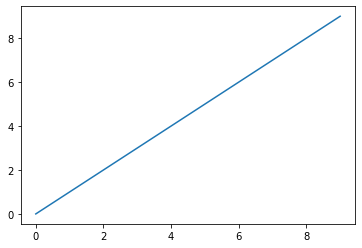

In [4]:
plt.plot(data)

## Figure 和 Subplot

In [ ]:
#matplotlib 的图像都位于 Figure 对象中。你可以用 plt.figure 创建一个新的 Figure

In [18]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [ ]:
#plt.figure 有一些选项，特别是 figsize，它用于确保当 图片保存到磁盘时具有一定的大小和纵横比。

In [ ]:
#不能通过空 Figure 绘图。必须用 add_subplot 创建一个或多个 subplot 才行:

In [20]:
ax1 = fig.add_subplot(2, 2, 1)

/Users/xl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


In [6]:
#这条代码的意思是:图像应该是 2×2 的(即最多 4 张图)，且当前选中的是 4 个 subplot 中的第一个(编号从 1 开始)。
#如果再把后面两个 subplot 也创建 出来，最终得到的图像如图 9-2 所示:

In [ ]:
#使用 Jupyter notebook 有一点不同，即每个小窗重新执行后，图形会被 重置。因此，对于复杂的图形，，你必须将所有的绘图命令存在一个小窗里。

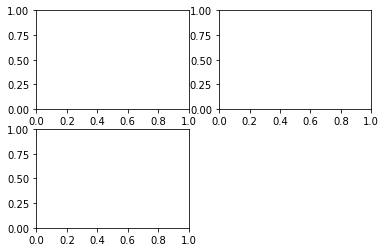

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

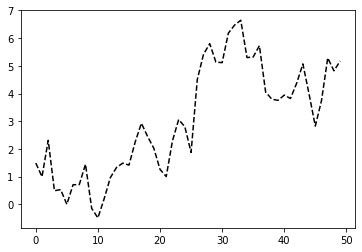

In [11]:
plt.plot(np.random.randn(50).cumsum(), 'k--')
#"k--"是一个线型选项，用于告诉 matplotlib 绘制黑色虚线图。

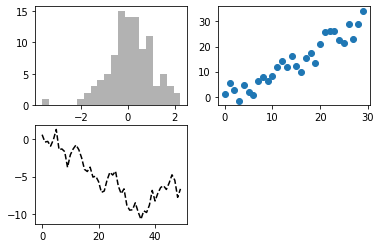

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')  #ax3 的地方画图
_ = ax1.hist(np.random.randn(100), bins=20, color='k',
alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 *
np.random.randn(30))

In [15]:
#创建包含 subplot 网格的 figure 是一个非常常见的任务，matplotlib 有一个 更为方便的方法 plt.subplots，
#它可以创建一个新的 Figure，并返回一个含有 已创建的 subplot 对象的 NumPy 数组:

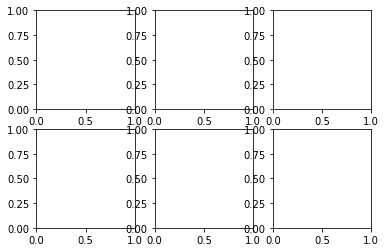

In [14]:
fig, axes = plt.subplots(2, 3)

In [16]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cb0def0>,
      dtype=object)

## 调整 subplot 周围的间距

In [ ]:
#默认情况下，matplotlib 会在 subplot 外围留下一定的边距，并在 subplot 之 间留下一定的间距。
#利用 Figure 的 subplots_adjust 方法可以轻而易举地修改间距，此外，它也是个顶级函数:
subplots_adjust(left=None, bottom=None, right=None, top=None,
               wspace=None, hspace=None)
#wspace 和 hspace 用于控制宽度和高度的百分比，可以用作 subplot 之间的间 距。

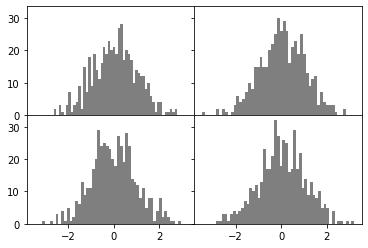

In [29]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k',
alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

## 颜色、标记和线型

In [ ]:
#matplotlib 的 plot 函数接受一组 X 和 Y 坐标，还可以接受一个表示颜色和线 型的字符串缩写。

In [ ]:
#要根据 x 和 y 绘制绿色虚线，你可以执行如下代码:
#方法一：
ax.plot(x, y, 'g--')
#方法二：
ax.plot(x, y, linestyle='--', color='g')

In [33]:
from numpy.random import randn

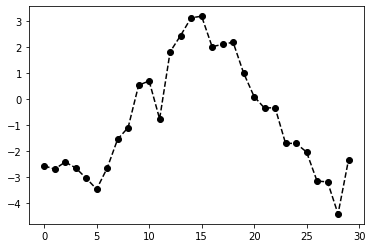

In [34]:
plt.plot(randn(30).cumsum(), 'ko--') 
#cumsum() 按照所给定的轴参数返回元素的梯形累计和，axis=0，按照行累加。axis=1，按照列累加。axis不给定具体值，就把numpy数组当成一个一维数组。

In [ ]:
#方式二：
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [ ]:
#在线型图中，非实际数据点默认是按线性方式插值的。可以通过 drawstyle 选 项修改(见图 9-7):

In [40]:
data = np.random.randn(30).cumsum()

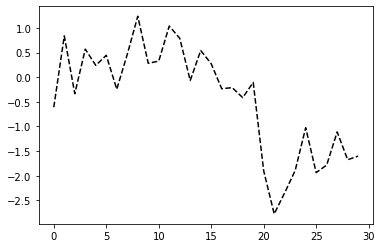

In [41]:
plt.plot(data, 'k--', label='Default')

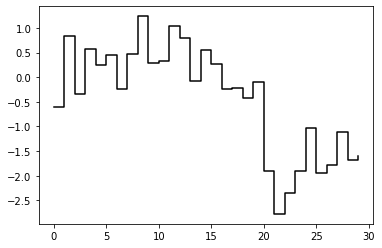

In [42]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

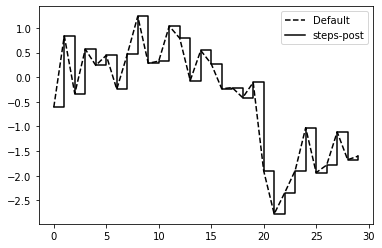

In [51]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')  #plt.legend(loc='位置')

## 刻度、标签和图例

In [ ]:
#对于大多数的图表装饰项，其主要实现方式有二:
#使用过程型的 pyplot 接口 (例如，matplotlib.pyplot)以及更为面向对象的原生 matplotlib API。

In [ ]:
#pyplot 接口的设计目的就是交互式使用，含有诸如 xlim、xticks 和 xticklabels 之类的方法。
#它们分别控制图表的范围、刻度位置、刻度标签 等。其使用方式有以下两种:
 调用时不带参数，则返回当前的参数值(例如，plt.xlim()返回当前的 X 轴绘图范 围)。
 调用时带参数，则设置参数值(例如，plt.xlim([0,10])会将 X 轴的范围设置为 0 到 10)。

In [ ]:
#它们各自对应 subplot 对象上的两个方法，以 xlim 为例，就是 ax.get_xlim 和 ax.set_xlim。

## 设置标题、轴标签、刻度以及刻度标签

In [ ]:
#为了说明自定义轴，我将创建一个简单的图像并绘制一段随机漫步(如图 9-8 所示):

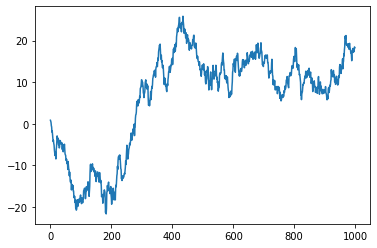

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [ ]:
#要改变 x 轴刻度，最简单的办法是使用 set_xticks 和 set_xticklabels。

In [ ]:
#前者 告诉 matplotlib 要将刻度放在数据范围中的哪些位置，默认情况下，这些位置 也就是刻度标签。
#但我们可以通过 set_xticklabels 将任何其他的值用作标 签:

In [56]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [57]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four',
'five'],
                            rotation=30, fontsize='small')

In [ ]:
#rotation 选项设定 x 刻度标签倾斜 30 度。最后，再用 set_xlabel 为 X 轴设置 一个名称，并用 set_title 设置一个标题(见图 9-9 的结果):


Text(0.5, 0, 'Stages')

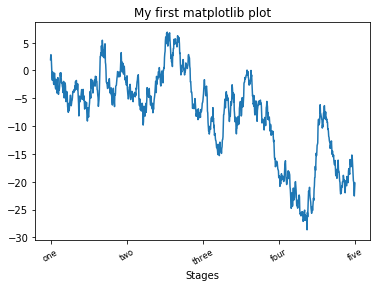

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four',
'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

In [ ]:
#Y 轴的修改方式与此类似，只需将上述代码中的 x 替换为 y 即可。轴的类有集合方法，可以批量设定绘图选项。前面的例子，也可以写为:

[Text(0, 0.5, 'Value'),
 Text(0.5, 0, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

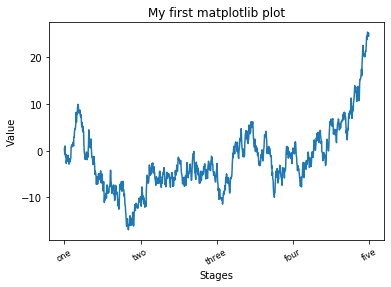

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four',
'five'],
                            rotation=30, fontsize='small')
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages',
    'ylabel': 'Value'
}
ax.set(**props)

## 添加图例

In [ ]:
#图例(legend)是另一种用于标识图表元素的重要工具。

In [ ]:
#最简单的是在添加 subplot 的时候传入 label 参数:

In [67]:
from numpy.random import randn

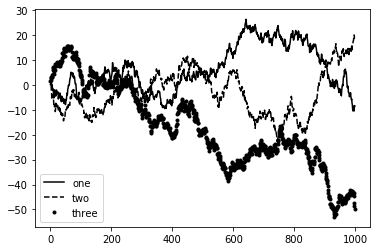

In [72]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')    #你可以调用 ax.legend()或 plt.legend()来自动创建图例

## 注解以及在 Subplot 上绘图

In [ ]:
#注解和文字可以通过 text、arrow 和 annotate 函数进行添加。 
#text 可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式:

In [ ]:
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)
#注解中可以既含有文本也含有箭头。

In [ ]:
#我们根据最近的标准普尔 500 指数 价格(来自 Yahoo!Finance)绘制一张曲线图，并标出 2008 年到 2009 年金融 危机期间的一些重要日期。

In [91]:
from datetime import datetime
import pandas as pd

In [92]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

In [94]:
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

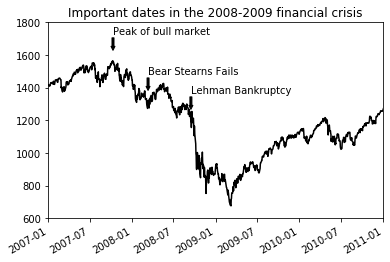

In [95]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
spx.plot(ax=ax, style='k-')
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

In [96]:
#这张图中有几个重要的点要强调:ax.annotate 方法可以在指定的 x 和 y 坐标 轴绘制标签。
#我们使用 set_xlim 和 set_ylim 人工设定起始和结束边界，而不 使用 matplotlib 的默认方法。
#最后，用 ax.set_title 添加图标标题
。

In [ ]:
#matplotlib 有一些表示常见图形的对象。这些对象被 称为块(patch)。
#其中有些(如 Rectangle 和 Circle)，可以在 matplotlib.pyplot 中找到，但完整集合位于 matplotlib.patches。

In [ ]:
#要在图表中添加一个图形，你需要创建一个块对象 shp，
#然后通过 ax.add_patch(shp)将其添加到 subplot 中(如图 9-12 所示):

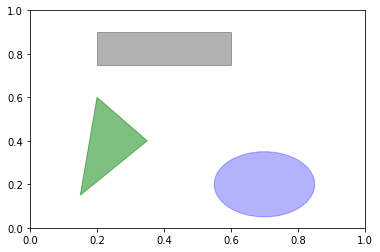

In [100]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)    #灰色长方形
ax.add_patch(circ)    #蓝色圆圈
ax.add_patch(pgon)    #绿色三角形

In [ ]:
#如果查看许多常见图表对象的具体实现代码，你就会发现它们其实就是由块patch 组装而成的。

## 将图表保存到文件

In [ ]:
#利用 plt.savefig 可以将当前图表保存到文件。
#该方法相当于 Figure 对象的实 例方法 savefig。
#例如，要将图表保存为 SVG 文件，你只需输入:
plt.savefig('figpath.svg')
#文件类型是通过文件扩展名推断出来的。

In [101]:
#如果你使用的是.pdf，就会得 到一个 PDF 文件。
#我在发布图片时最常用到两个重要的选项是 dpi(控制“每 英寸点数”分辨率)和 bbox_inches(可以剪除当前图表周围的空白部分)。 
#要得到一张带有最小白边且分辨率为 400DPI 的 PNG 图片，你可以:

In [ ]:
#plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [ ]:
#savefig 并非一定要写入磁盘，也可以写入任何文件型的对象，比如 BytesIO:

In [103]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

In [108]:
#实际使用：

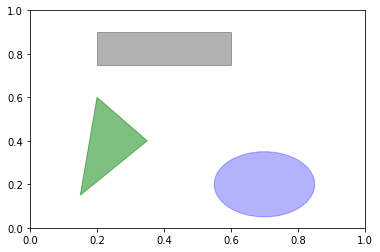

In [106]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)    #灰色长方形
ax.add_patch(circ)    #蓝色圆圈
ax.add_patch(pgon)    #绿色三角形
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

## matplotlib 配置

In [ ]:
#matplotlib 自带一些配色方案，以及为生成出版质量的图片而设定的默认配置 信息。
#一种 Python 编程方式配置系统的方法是使用 rc 方法。

In [ ]:
#单个设置：
#全局的图像默认 大小设置为 10×10，你可以执行:
plt.rc('figure', figsize=(10, 10))

In [ ]:
#rc 的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、 'ytick'、'grid'、'legend'等。
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

# 9.2 使用 pandas 和 seaborn 绘图 P285

## 线型图

In [ ]:
#Series 和 DataFrame 都有一个用于生成各类图表的 plot 方法。默认情况下， 它们所生成的是线型图(如图 9-13 所示):

In [109]:
s = pd.Series(np.random.randn(10).cumsum(),
index=np.arange(0, 100, 10))
s

0     0.483448
10    0.596129
20    1.871415
30    1.627965
40    1.342376
50    2.208068
60    2.400781
70    1.411105
80    2.429637
90    1.628691
dtype: float64

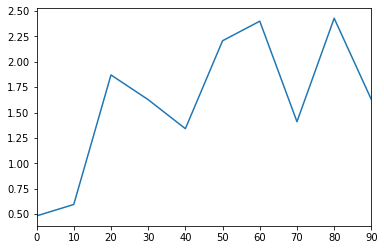

In [110]:
s.plot()

In [ ]:
#DataFrame 的 plot 方法会在一个 subplot 中为各列绘制一条线，并自动创建图 例(如图 9-14 所示):

In [111]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-1.775510,-0.146671,0.251132,0.422384
10,1.096151,-0.758514,0.692567,0.562832
20,1.215273,-0.248849,-1.963070,0.694575
30,1.556428,0.503728,-2.429947,-0.113627
40,0.599615,0.407634,-3.696672,0.068579
50,0.879714,-0.982930,-4.249235,-0.075201
60,1.303253,-0.176669,-3.428174,-1.590796
70,-1.108596,0.309208,-2.523047,-1.787251
80,-1.857645,-1.289667,-3.011740,-1.658170
90,0.307288,0.834270,-3.219244,-1.954315


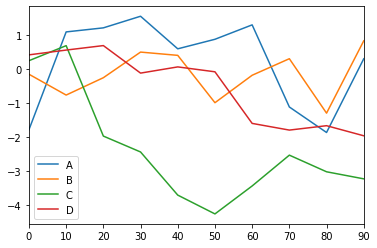

In [112]:
df.plot()

In [ ]:
#plot 属性包含一批不同绘图类型的方法。例如，df.plot()等价于
df.plot.line()。

## 柱状图

In [ ]:
#plot.bar()和 plot.barh()分别绘制水平和垂直的柱状图。
#这时，Series 和 DataFrame 的索引将会被用作 X(bar)或 Y(barh)刻度(如图 9-15 所示):

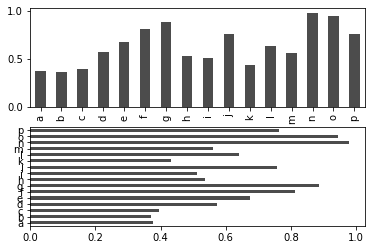

In [116]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)
#color='k'和 alpha=0.7 设定了图形的颜色为黑色，并使用部分的填充透明度。

In [ ]:
#对于 DataFrame，柱状图会将每一行的值分为一组，并排显示，如图 9-16 所 示:

In [117]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four',
'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'],
name='Genus'))
df

Genus,A,B,C,D
one,0.903206,0.381078,0.957972,0.595403
two,0.910158,0.447595,0.950970,0.612252
three,0.505653,0.944971,0.117606,0.907848
four,0.574046,0.725464,0.806742,0.554367
five,0.933206,0.233603,0.470823,0.032885
six,0.696209,0.438859,0.318486,0.907918


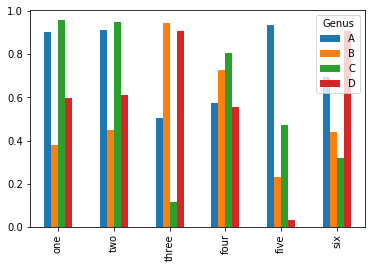

In [118]:
df.plot.bar()

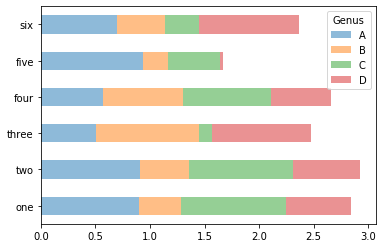

In [119]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
#柱状图有一个非常不错的用法:利用 value_counts 图形化显示 Series中各值的出现频率，比如 s.value_counts().plot.bar()。


In [ ]:
#再以本书前面用过的那个有关小费的数据集为例，假设我们想要做一张堆积柱 状图以展示每天各种聚会规模的数据点的百分比。
#我用 read_csv 将数据加载进 来，然后根据日期和聚会规模创建一张交叉表:

In [125]:
tips = pd.read_csv('examples/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [120]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])   #pd.crosstab 用于生成交叉表
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [122]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [123]:
#然后进行规格化，使得各行的和为 1，并生成图表(如图 9-18 所示):
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


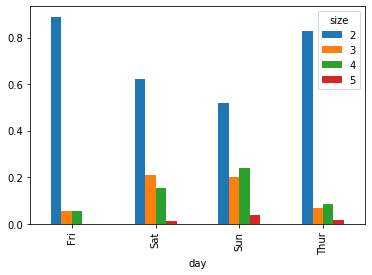

In [124]:
party_pcts.plot.bar()

In [ ]:
##换种方式，使用seaborn

In [ ]:
#对于在绘制一个图形之前，需要进行合计的数据，使用 seaborn 可以减少工作 量。用 seaborn 来看每天的小费比例(图 9-19 是结果):

In [141]:
import seaborn as sns

In [142]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] -
tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


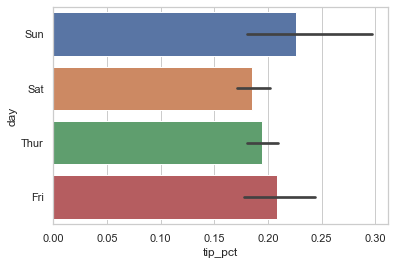

In [143]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')  #orient : “h” | “v”, optional #控制绘图的方向，水平或者竖直

In [ ]:
#seaborn.barplot 有颜色选项，使我们能够通过一个额外的值设置(见图 9- 20):

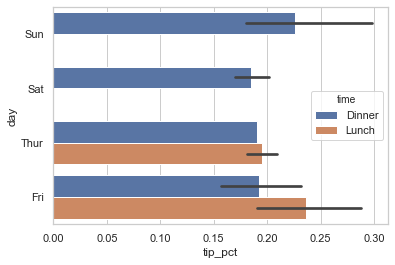

In [140]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips,    # hue 颜色控制的变量
orient='h')
sns.set(style="whitegrid")  #seaborn 已经自动修改了图形的美观度:默认调色板，图形背景和网格线的颜色。
#你可以用 seaborn.set 在不同的图形外观之间切换:

## 直方图和密度图

In [ ]:
#直方图(histogram)是一种可以对值频率进行离散化显示的柱状图。

In [ ]:
#再以前 面那个小费数据为例，通过在 Series 使用 plot.hist 方法，我们可以生成一张 “小费占消费总额百分比”的直方图(如图 9-21 所示):

In [145]:
tips['tip_pct']

0      0.063204
1      0.191244
2      0.199886
3      0.162494
4      0.172069
5      0.228863
6      0.295421
7      0.131313
8      0.149847
9      0.279654
10     0.199766
11     0.165235
12     0.113357
13     0.194426
14     0.255715
15     0.221971
16     0.192841
17     0.294913
18     0.259837
19     0.193642
20     0.294798
21     0.156784
22     0.164697
23     0.238065
24     0.191106
25     0.151261
26     0.175901
27     0.187091
28     0.247126
29     0.180180
         ...   
214    0.299954
215    0.093220
216    0.119284
217    0.148662
218    0.228571
219    0.114233
220    0.220884
221    0.350101
222    0.288288
223    0.231125
224    0.133446
225    0.181554
226    0.247219
227    0.171920
228    0.257576
229    0.149688
230    0.090868
231    0.236407
232    0.412409
233    0.158065
234    0.239425
235    0.141723
236    0.086207
237    0.036955
238    0.149872
239    0.256166
240    0.079428
241    0.096759
242    0.108899
243    0.190114
Name: tip_pct, Length: 2

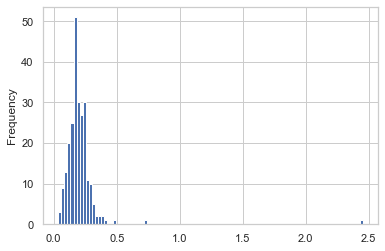

In [151]:
tips['tip_pct'].plot.hist(bins=100) #这个参数指定bin(箱子)的个数,也就是总共有几条条状图

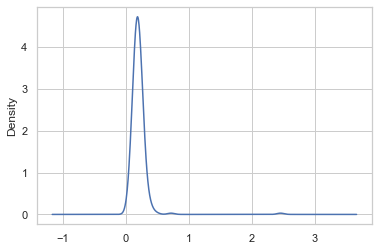

In [146]:
#使用 plot.kde 和标准混合正态分布估计 即可生成一张密度图(见图 9-22):
tips['tip_pct'].plot.density()

In [ ]:
#seaborn 的 distplot 方法绘制直方图和密度图更加简单，还可以同时画出直方 图和连续密度估计图。

In [147]:
comp1 = np.random.normal(0, 1, size=200)
#loc：float
#    此概率分布的均值（对应着整个分布的中心centre）
#scale：float
#    此概率分布的标准差（对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高）
#size：int or tuple of ints
#    输出的shape，默认为None，只输出一个值

In [148]:
comp2 = np.random.normal(10, 2, size=200)

In [149]:
values = pd.Series(np.concatenate([comp1, comp2]))
values

0      -0.653092
1       0.594898
2       1.496250
3      -0.475147
4       1.384453
5      -0.275020
6       0.372668
7       1.746374
8      -0.325514
9       2.057385
10      0.230714
11     -1.941811
12     -0.487153
13      0.731935
14      0.737885
15     -0.870733
16     -0.322191
17      0.788056
18     -0.477804
19      0.254777
20     -0.172418
21      0.089820
22      0.087437
23     -0.161393
24     -0.114466
25      0.480130
26      0.604227
27     -1.173260
28     -0.172314
29     -1.238207
         ...    
370    10.884344
371    10.079211
372    10.689639
373     9.476248
374     9.801766
375     7.942946
376     9.680453
377     7.766935
378    12.283482
379     8.451522
380     7.680341
381     8.664797
382     8.596813
383    10.903320
384    10.749638
385    10.605884
386     8.655280
387    11.498094
388    10.930156
389    10.434614
390    10.537807
391    12.503256
392    11.014616
393     7.781446
394     8.183222
395     8.116148
396    10.420516
397     6.3624

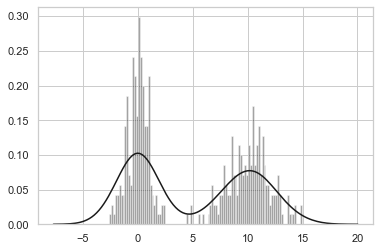

In [150]:
sns.distplot(values, bins=100, color='k')

## 散布图或点图

In [ ]:
#点图或散布图是观察两个一维数据序列之间的关系的有效手段。

In [ ]:
#我加载了来自 statsmodels 项目的 macrodata 数据集，选择了几个变 量，然后计算对数差:

In [152]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
5,29.550,140.2,2.68,5.2
6,29.750,140.9,2.36,5.6
7,29.840,141.1,2.29,6.3
8,29.810,142.1,2.37,6.8
9,29.920,142.9,2.29,7.0


In [158]:
trans_data = np.log(data).diff().dropna()   
#log常用以自然对数为底数   #diff()
#dropna() 删除缺失数据(pd.dropna()方法)

In [159]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [ ]:
#然后可以使用 seaborn 的 regplot 方法，
#它可以做一个散布图，并加上一条线 性回归的线(见图 9-24):

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

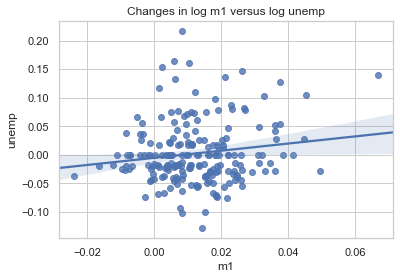

In [162]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1',
'unemp'))

In [ ]:
#在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被 称为散布图矩阵(scatter plot matrix)。

In [ ]:
#seaborn 提供了一个便捷的 pairplot 函数，它支持在对角线上放置每个变 量的直方图或密度估计(见图 9-25):

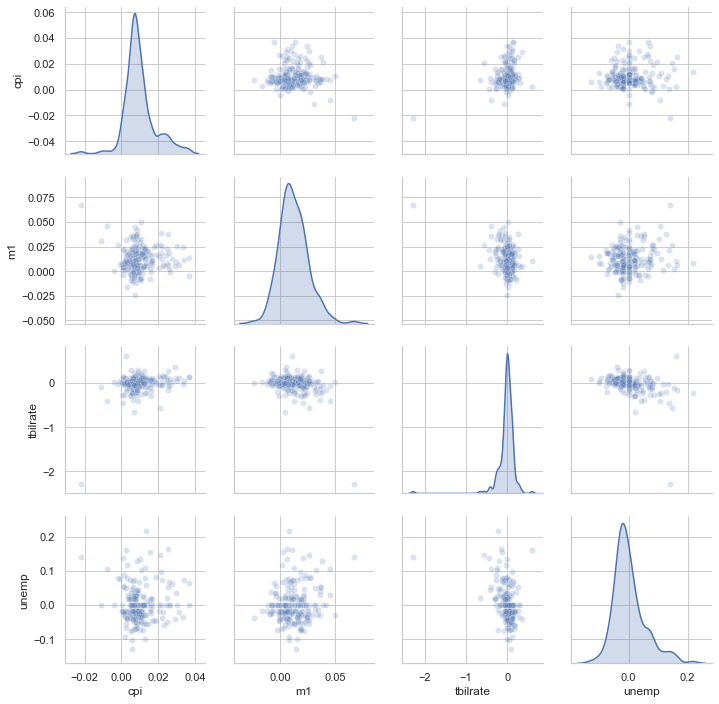

In [163]:
sns.pairplot(trans_data, diag_kind='kde',
plot_kws={'alpha': 0.2})

## 分面网格(facet grid)和类型数据

In [ ]:
#seaborn 有一个有用的内置函数 factorplot，可以简化制作多 种分面图(见图 9-26):

/Users/xl/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


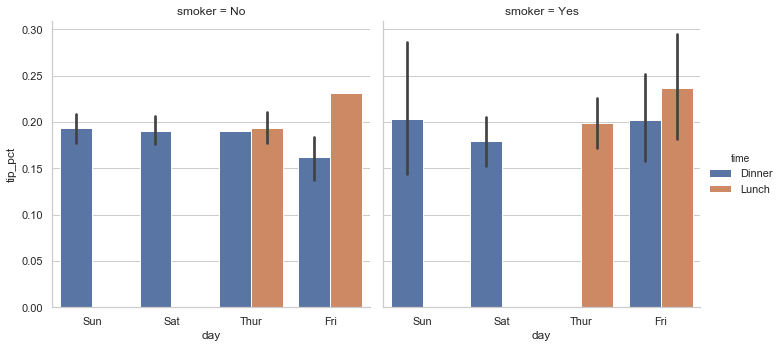

In [164]:
sns.factorplot(x='day', y='tip_pct', hue='time',
col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
#除了在分面中用不同的颜色按时间分组，我们还可以通过给每个时间值添加一行来扩展分面网格

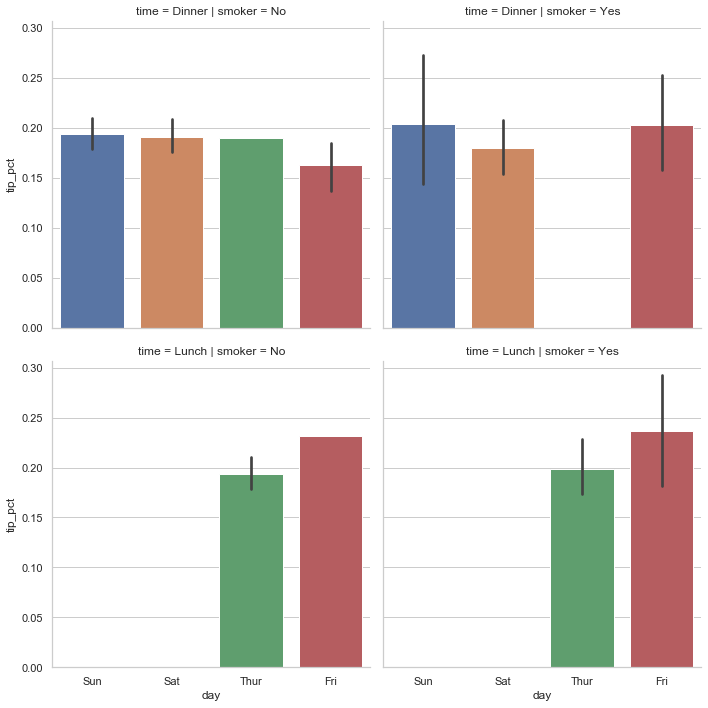

In [165]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
#factorplot 支持其它的绘图类型，你可能会用到。例如，盒图(它可以显示中
#位数，四分位数，和异常值)就是一个有用的可视化类型(见图 9-28):

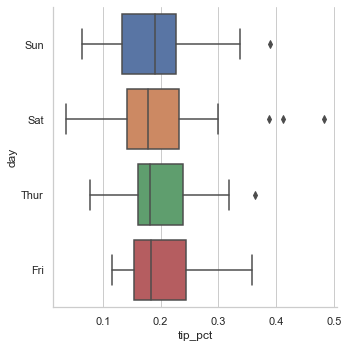

In [166]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

# 9.3 其它的 Python 可视化工具 P302

# 9.4 总结 P303